In [ ]:
# Exploratory Data Analysis - Retail
# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

# As a business manager, try to find out the weak areas where you can work to make more profit.

# What all business problems you can derive by exploring the data?

# I used Python to perform EDA on this dataset.

# Dataset: https://bit.ly/3i4rbWl

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("D:/Project MCA/the sparks foundation/Retail Analysis/SampleSuperstore.csv")

In [6]:
#Basic data Insighnts

In [7]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
397,Standard Class,Home Office,United States,Jackson,Michigan,49201,Central,Office Supplies,Supplies,70.120,4,0.0,21.0360
4362,Second Class,Consumer,United States,Fargo,North Dakota,58103,Central,Office Supplies,Art,131.940,3,0.0,35.6238
4392,Standard Class,Corporate,United States,Dallas,Texas,75081,Central,Office Supplies,Art,70.368,2,0.2,6.1572
3014,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Office Supplies,Paper,20.736,4,0.2,7.2576
5866,Second Class,Corporate,United States,Meriden,Connecticut,6450,East,Furniture,Chairs,1133.350,5,0.0,294.6710


In [8]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
df.shape

(9994, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
#Number of unique values in each column

In [14]:
for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [15]:
#Check for null values

In [16]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

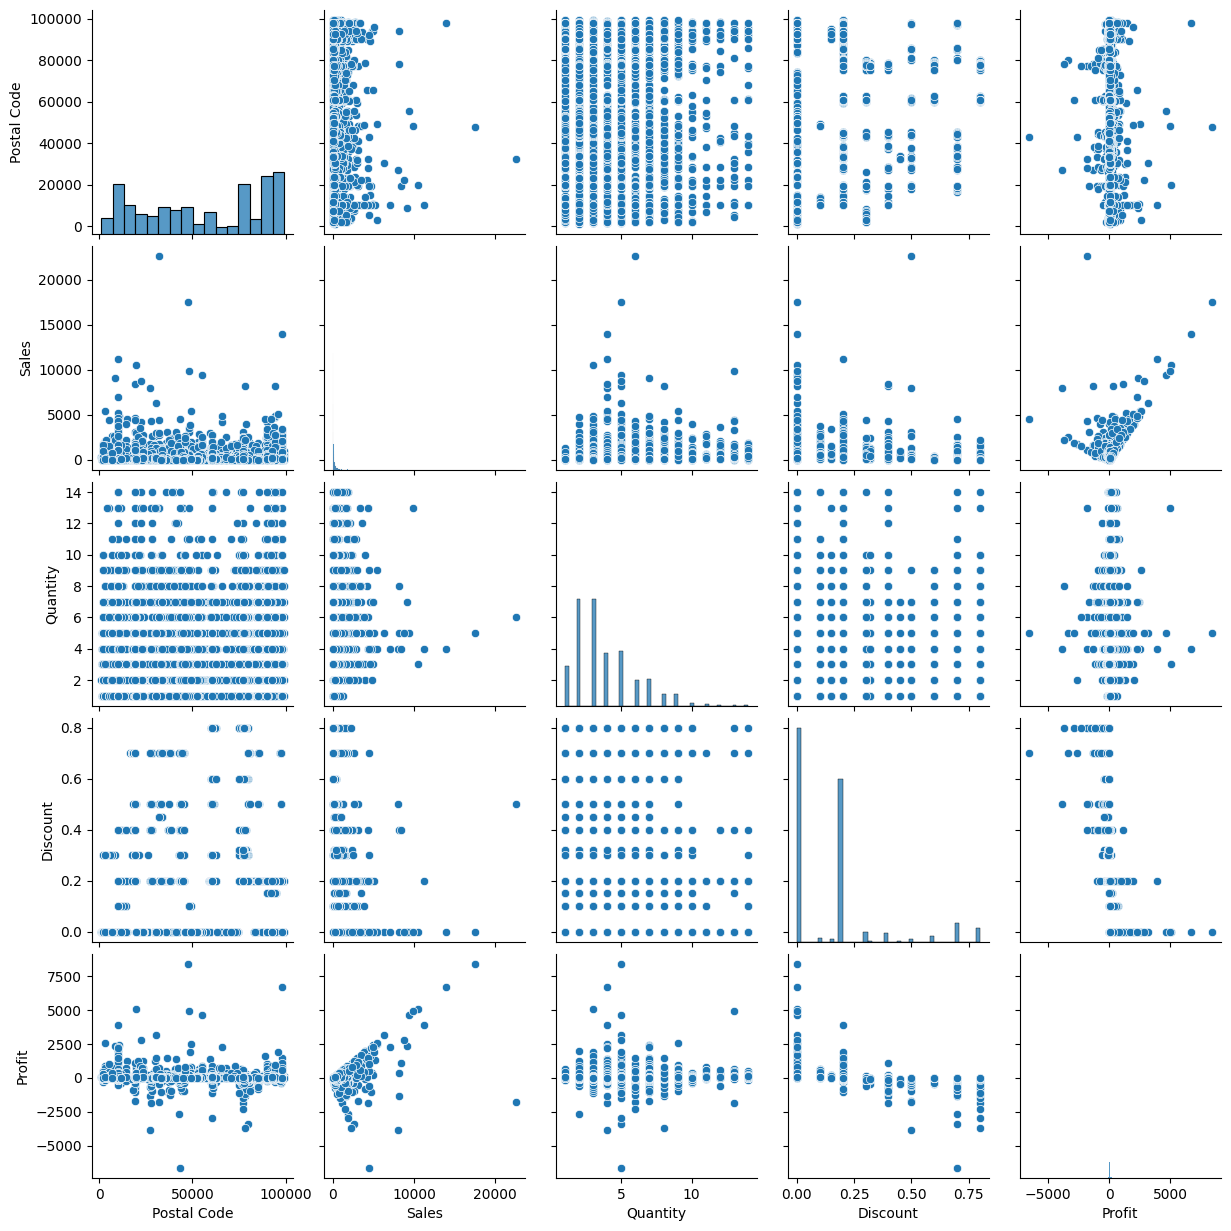

In [17]:
sns.pairplot(df)

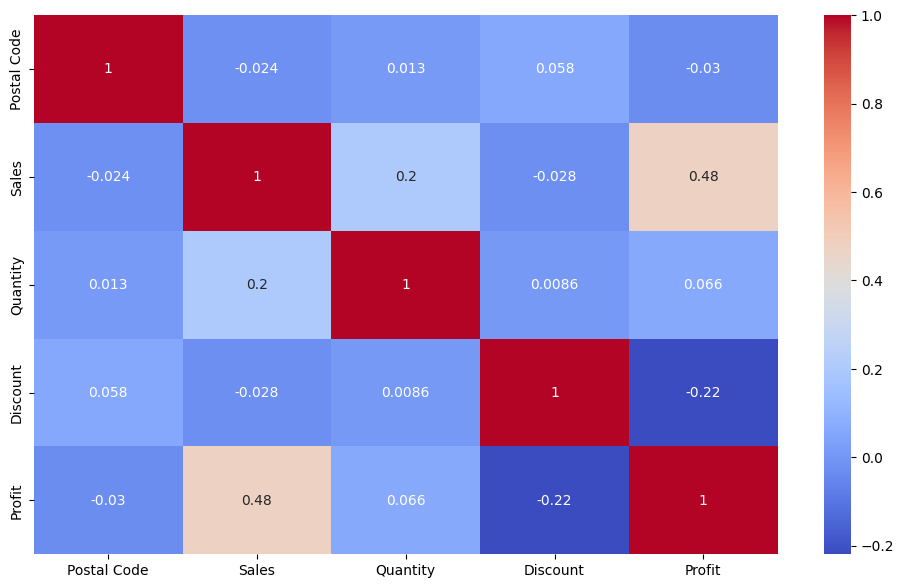

In [25]:
numeric_df = df.select_dtypes(include=[float, int])

# Plot heatmap
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

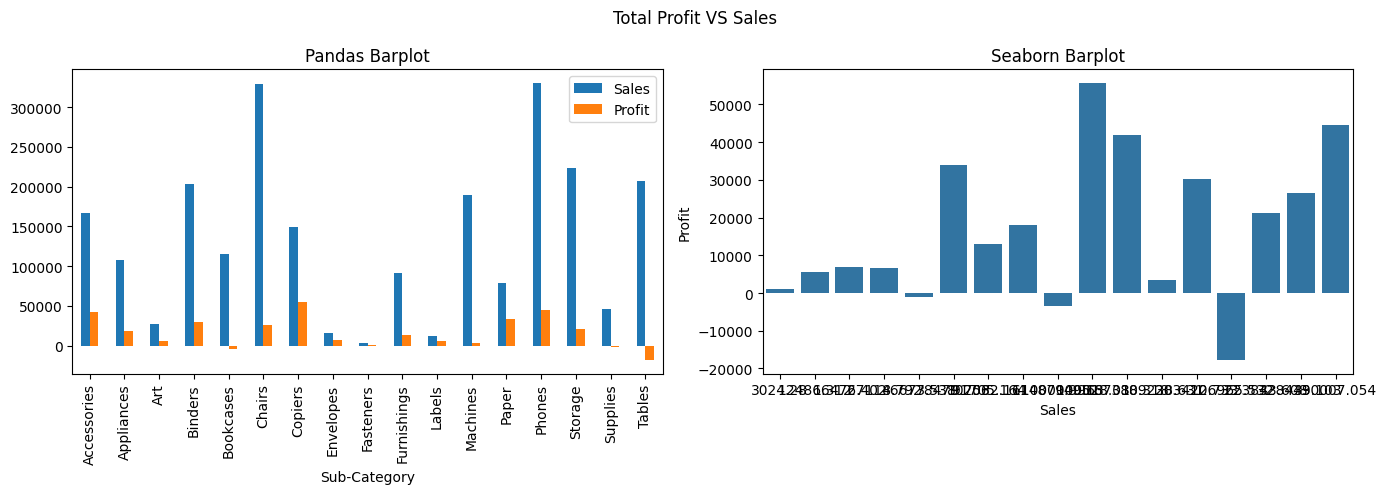

In [35]:
# Group by 'Sub-Category' and calculate the sum of 'Sales' and 'Profit'
grouped_df = df.groupby('Sub-Category')[['Sales', 'Profit']].agg(sum).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Total Profit VS Sales")

# Barplot using Seaborn
sns.barplot(data=grouped_df, x='Sales', y='Profit', ax=axes[1])
axes[1].set_title('Seaborn Barplot')

# Barplot using Pandas plot
grouped_df.plot(kind='bar', x='Sub-Category', ax=axes[0])
axes[0].set_title('Pandas Barplot')
axes[0].set_xticklabels(grouped_df['Sub-Category'], rotation=90)

plt.tight_layout()
plt.show()

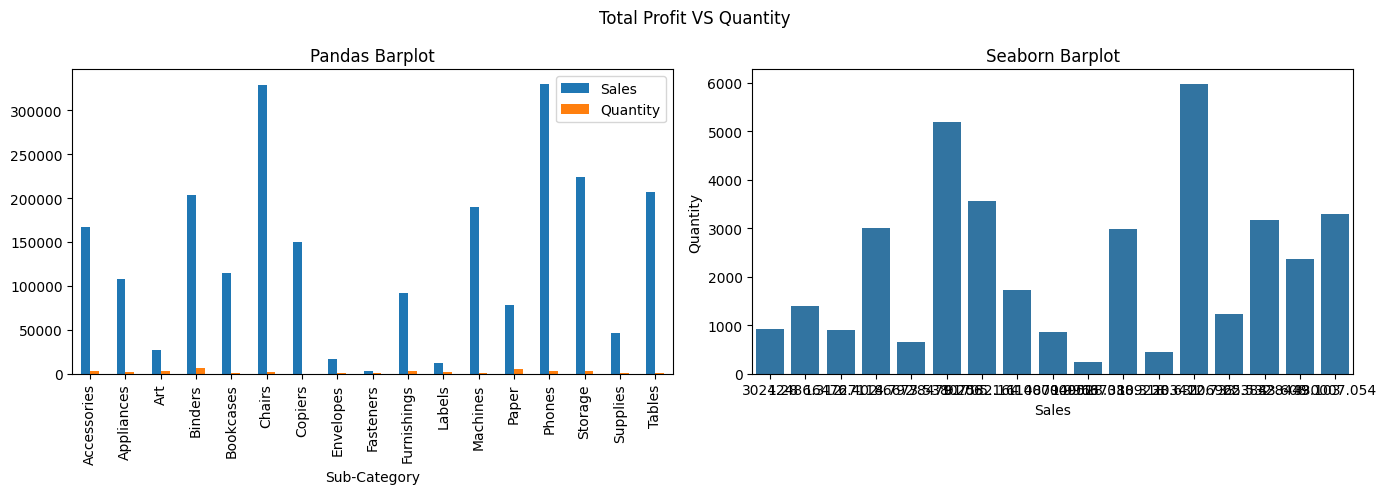

In [37]:
# Group by 'Sub-Category' and calculate the sum of 'Sales' and 'Quantity'
grouped_df = df.groupby('Sub-Category')[['Sales', 'Quantity']].agg(sum).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Total Profit VS Quantity")

# Barplot using Seaborn
sns.barplot(data=grouped_df, x='Sales', y='Quantity', ax=axes[1])
axes[1].set_title('Seaborn Barplot')

# Barplot using Pandas plot
grouped_df.plot(kind='bar', x='Sub-Category', ax=axes[0])
axes[0].set_title('Pandas Barplot')
axes[0].set_xticklabels(grouped_df['Sub-Category'], rotation=90)

plt.tight_layout()
plt.show()

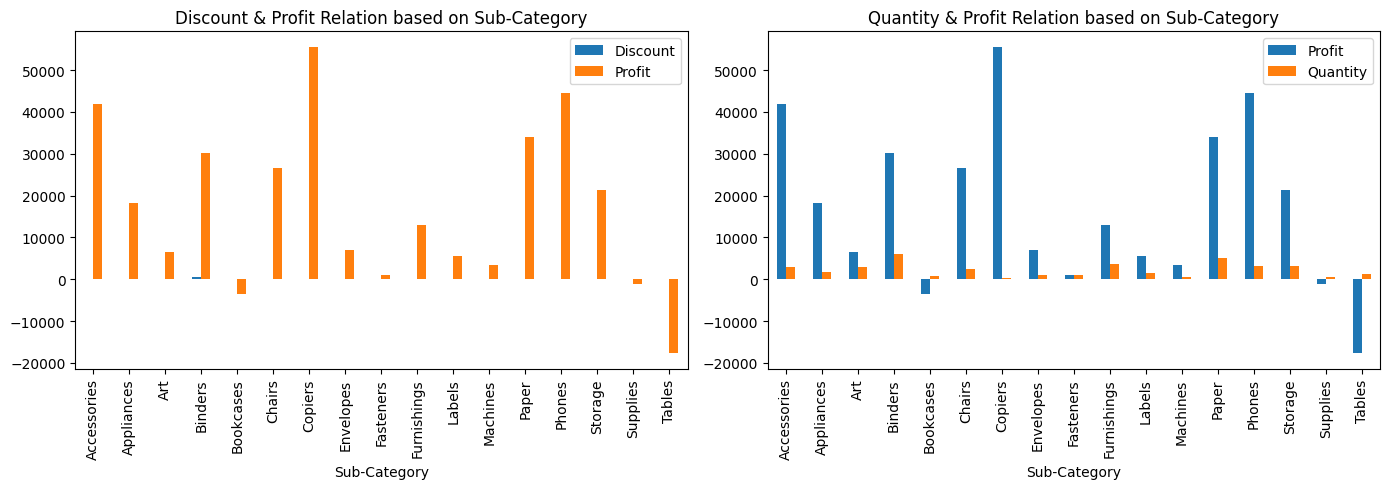

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Group by 'Sub-Category' and calculate the sum of 'Discount' and 'Profit'
discount_profit = df.groupby('Sub-Category')[['Discount', 'Profit']].agg(sum)
discount_profit.plot(kind='bar', ax=axes[0])
axes[0].set_title('Discount & Profit Relation based on Sub-Category')

# Group by 'Sub-Category' and calculate the sum of 'Profit' and 'Quantity'
profit_quantity = df.groupby('Sub-Category')[['Profit', 'Quantity']].agg(sum)
profit_quantity.plot(kind='bar', ax=axes[1])
axes[1].set_title('Quantity & Profit Relation based on Sub-Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

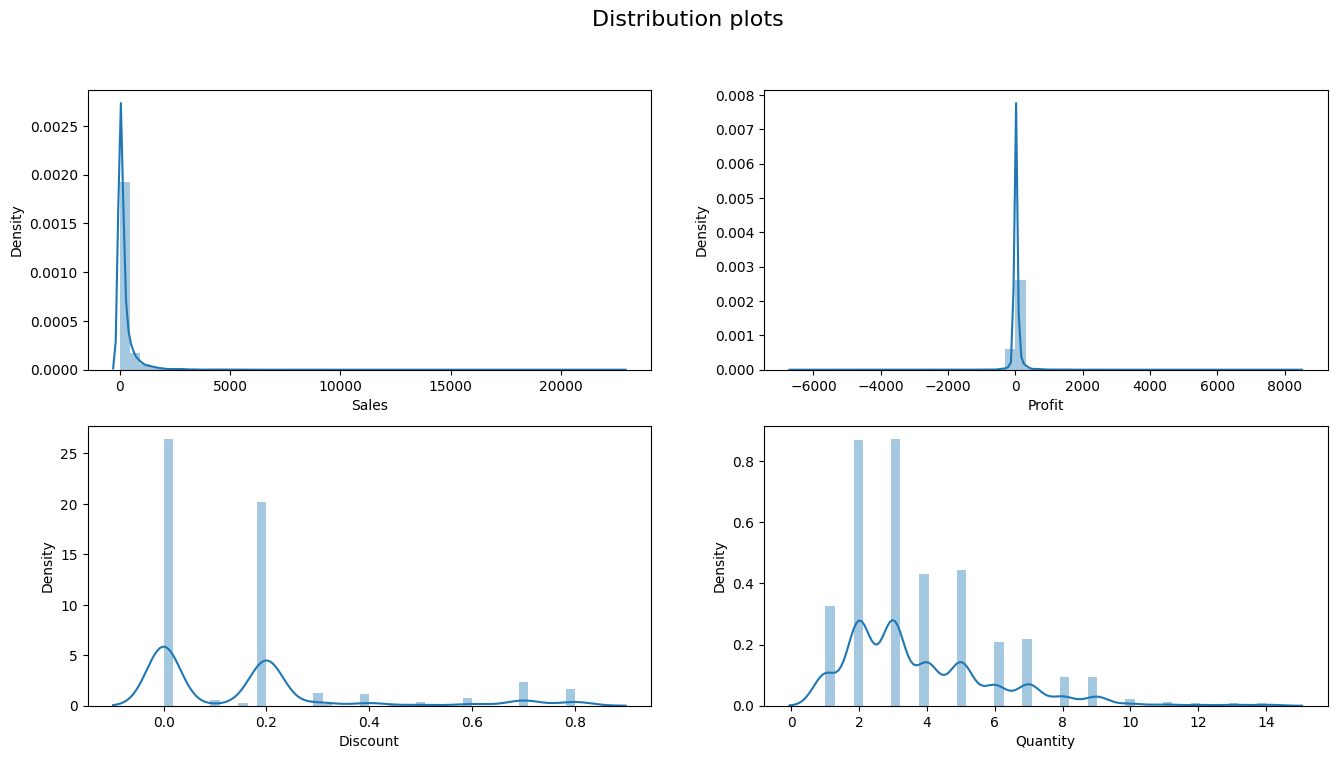

In [41]:

fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

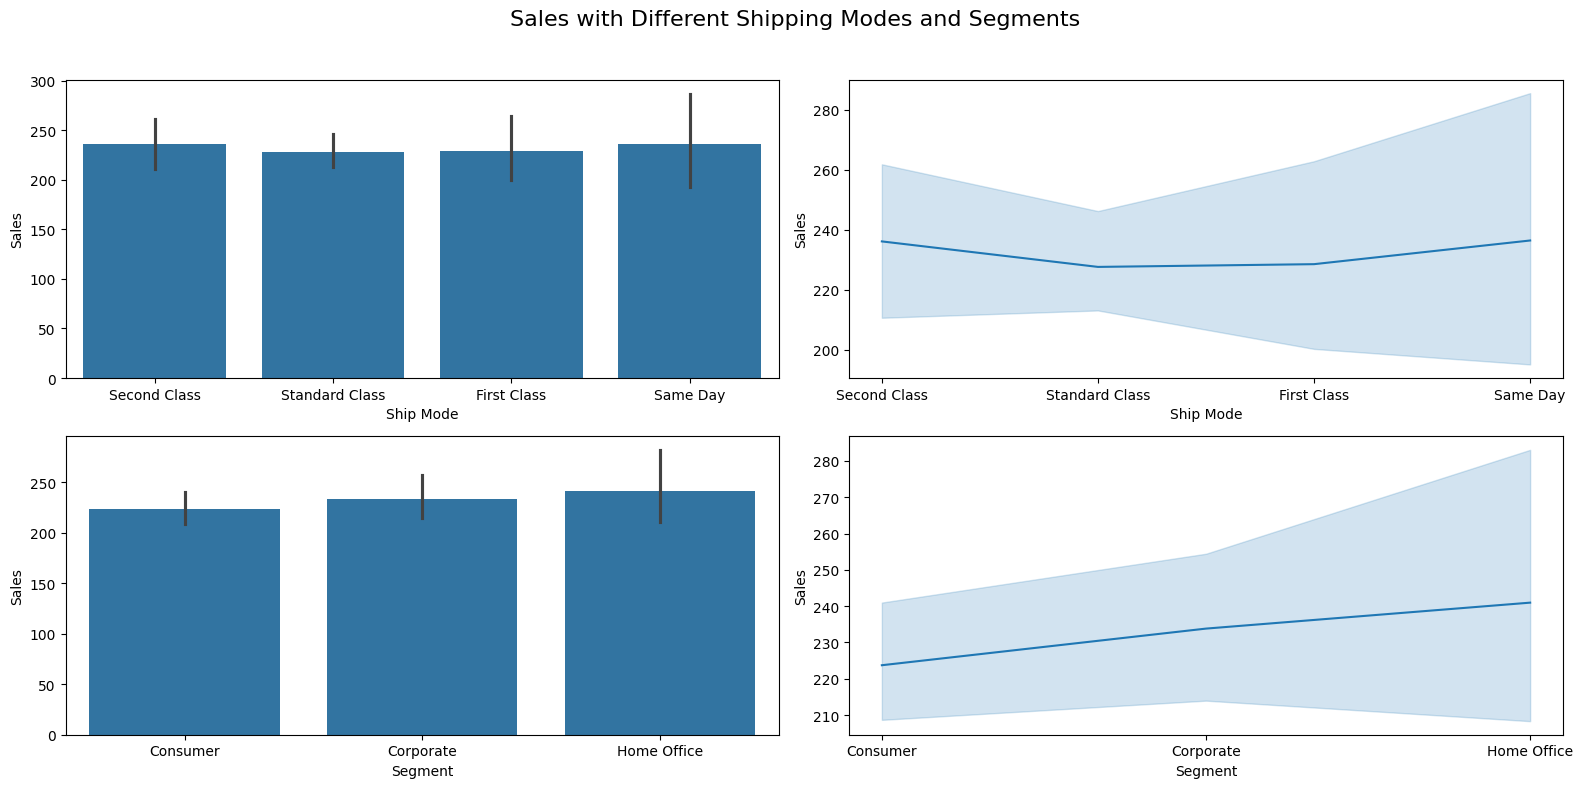

In [46]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Set the main title for the figure
fig.suptitle("Sales with Different Shipping Modes and Segments", fontsize=16)

# Plot the data
sns.barplot(x='Ship Mode', y='Sales', data=df, ax=axes[0, 0])
sns.lineplot(x='Ship Mode', y='Sales', data=df, ax=axes[0, 1])
sns.barplot(x='Segment', y='Sales', data=df, ax=axes[1, 0])
sns.lineplot(x='Segment', y='Sales', data=df, ax=axes[1, 1])

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
plt.show()

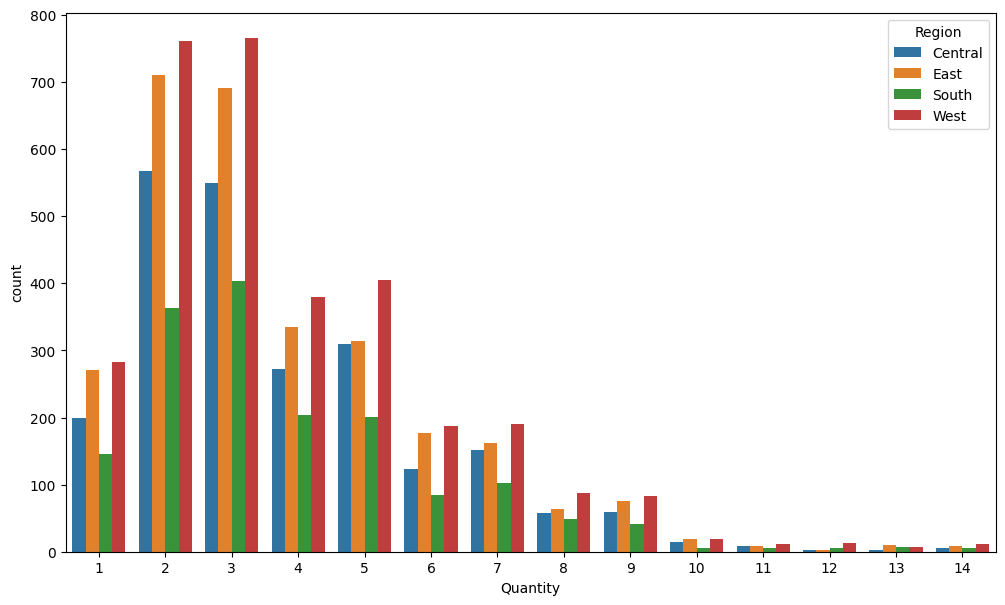

In [48]:
# Create the subplot
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Create the countplot
sns.countplot(x='Quantity', hue='Region', data=df, ax=ax)

# Show the plot
plt.show()

In [ ]:
# #
# Some important Findings
# 1. The features Profit and Discounts are highly related.
# 2. Over Less quantity of products also the sales were high.
# 3. The maximum quantity of product in demand was in range 2-4.
# 4. The mode of shipping doesn't affect much to the sales
# 5. The Home Office provides highest sales followed by Corporate by a slight variation